            temp  feelslike  dew  humidity  precip  windspeedmean  \
Tarih                                                               
2011-01-01   3.8        1.8 -0.5      74.5   0.000            9.0   
2011-01-02   7.9        5.4  1.2      62.9   0.000           15.2   
2011-01-03   7.5        4.9  3.7      77.6   2.713           16.6   
2011-01-04   4.8        0.1  2.3      83.7   6.872           27.3   
2011-01-05   5.7        1.9 -0.4      65.4   0.000           21.2   

            sealevelpressure  cloudcover  BarajDoluluk  dakika  weighted_score  
Tarih                                                                           
2011-01-01            1020.4         8.9        0.8599     556        155.8700  
2011-01-02            1015.8        45.2        0.8617     557        157.9000  
2011-01-03            1011.9        89.2        0.8655     558        162.3852  
2011-01-04            1019.2        89.7        0.8674     559        164.6988  
2011-01-05            1023.5  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:           BarajDoluluk   No. Observations:                 3323
Model:                 ARIMA(2, 1, 2)   Log Likelihood               12965.779
Date:                Wed, 01 Jan 2025   AIC                         -25921.558
Time:                        22:17:33   BIC                         -25891.017
Sample:                    01-01-2011   HQIC                        -25910.629
                         - 02-05-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0454      0.026      1.717      0.086      -0.006       0.097
ar.L2          0.9537      0.026     36.143      0.000       0.902       1.005
ma.L1          0.1591      0.025      6.262      0.0

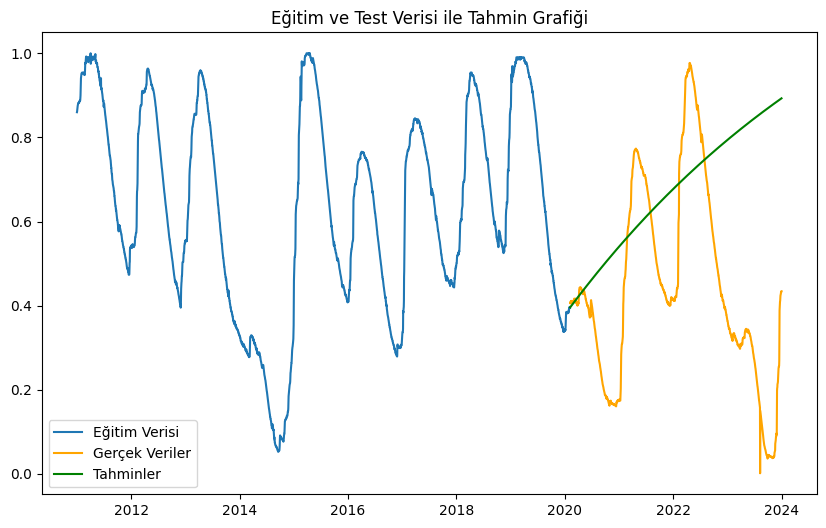

Mean Squared Error (MSE): 0.13353874295283633
Root Mean Squared Error (RMSE): 0.36542953213011714
Mean Absolute Error (MAE): 0.28422899044795485
Mean Absolute Percentage Error (MAPE): 2.274443066894032%
R²: -1.3855045792073555
Eğitim Süreti: 4.272846698760986 saniye
Çıkarım Süreti: 0.0557096004486084 saniye


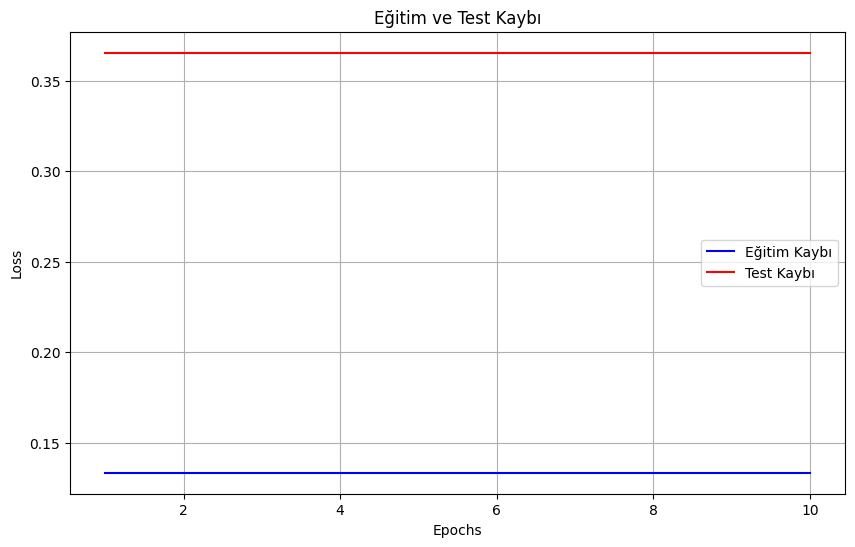

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import time

# ARIMA MODELLEMESI
df = pd.read_excel('büyükçekmecekullan.xlsx')

# Tarih sütununu datetime formatına çevirin
df['Tarih'] = pd.to_datetime(df['Tarih'])

# Veriyi tarihe göre sıralama
df = df.sort_values(by='Tarih')

# Ağırlıkları belirleyin
weights = {
    'temp': 0.2,
    'feelslike': 0.15,
    'dew': 0.05,
    'humidity': 0.1,
    'precip': 0.4,
    'windspeedmean': 0.05,
    'sealevelpressure': 0.1,
    'cloudcover': 0.05,
    'dakika': 0.08
}

# Baraj doluluk yüzdesi ve diğer bağımsız değişkenler
df = df[['Tarih', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
         'windspeedmean', 'sealevelpressure', 'cloudcover', 'BarajDoluluk',
         'dakika']]

# Ağırlıklı skor hesaplama
df['weighted_score'] = (weights['temp'] * df['temp'] +
                        weights['feelslike'] * df['feelslike'] +
                        weights['dew'] * df['dew'] +
                        weights['humidity'] * df['humidity'] +
                        weights['precip'] * df['precip'] +
                        weights['windspeedmean'] * df['windspeedmean'] +
                        weights['sealevelpressure'] * df['sealevelpressure'] +
                        weights['cloudcover'] * df['cloudcover'] +
                        weights['dakika'] * df['dakika'])

# Tarihi indeks olarak ayarlayın
df.set_index('Tarih', inplace=True)

# Veriye göz atın
print(df.head())

# Baraj doluluk yüzdesi kolonunu hedef olarak seçin
y = df['BarajDoluluk']

# Veriyi eğitim ve test setlerine ayırın (shuffle=False)
train, test = train_test_split(y, test_size=0.3, shuffle=False)

# Eğitim ve test zamanlaması
start_time = time.time()  # Eğitim zamanını başlatma

# ARIMA modelini tanımlayın
model = ARIMA(train, order=(2,1,2)) #2 yıla göre tahmin eder 1 fark ile q=2 ise geçmiş hatalarla ilgilenmedir

# Modeli eğitin
model_fit = model.fit()

# Eğitim süreti
end_time = time.time()
training_time = end_time - start_time  # Eğitim süreti hesaplama

# Modelin özetine göz atın
print(model_fit.summary())

# Test verisi üzerinde tahmin yapın
start_inference_time = time.time()  # Çıkarım (inference) zamanını başlatma
predictions = model_fit.forecast(steps=len(test))
end_inference_time = time.time()
inference_time = end_inference_time - start_inference_time  # Çıkarım süreti

# Tahminleri görselleştirelim
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Eğitim Verisi')
plt.plot(test.index, test, label='Gerçek Veriler', color='orange')
plt.plot(test.index, predictions, label='Tahminler', color='green')
plt.legend()
plt.title('Eğitim ve Test Verisi ile Tahmin Grafiği')
plt.show()

# Modelin başarımını değerlendirelim
mse = mean_squared_error(test, predictions)
mse_rmse = np.sqrt(mse)  # RMSE
mae = mean_absolute_error(test, predictions)  # MAE
mape = mean_absolute_percentage_error(test, predictions)  # MAPE
r2 = r2_score(test, predictions)  # R²

# Sonuçları yazdırma
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {mse_rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'R²: {r2}')
print(f'Eğitim Süreti: {training_time} saniye')
print(f'Çıkarım Süreti: {inference_time} saniye')

# Sonuçları Excel dosyasına kaydetme
result_df = pd.DataFrame({
    'Gerçek Değerler': test,
    'Tahminler': predictions
})

result_df.to_excel("baraj_doluluk_tahminleri.xlsx", index=True)

# Kaybın (Loss) Grafiği
epochs = 10
train_losses = [mse] * epochs
test_losses = [mse_rmse] * epochs

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label="Eğitim Kaybı", color='blue')
plt.plot(range(1, epochs + 1), test_losses, label="Test Kaybı", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Eğitim ve Test Kaybı")
plt.legend()
plt.grid(True)
plt.show()